In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import json
import math
import os

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Helvetica"
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
df = pd.read_csv(f'Video Survey.csv')
df = df.loc[df['If you consent to taking this survey, please select \'Yes\''] == 'Yes']
df

,Timestamp,"If you consent to taking this survey, please select 'Yes'",What is your gender?,What is your age?,Please rate the your experience of watching Video #1 based on the scale below.,Please rate the your experience of watching Video #2 based on the scale below.,Please rate your experience of watching Video #2 in comparison to Video #1.,"If you experienced any quality issues with the videos (e.g., jitter, pauses) or would like to describe your experience, please write below. Please also mention the specific video."
0,6/23/2021 20:09:33,Yes,Female,22,2,1,2,NaN
1,6/23/2021 20:18:44,Yes,Male,22,4,1,1,video 2 seemed to be lagging compared to video...
2,6/23/2021 20:54:24,Yes,Male,21,4,4,5,NaN
3,6/23/2021 20:56:22,Yes,Male,20,2,1,3,A lot of pauses in video 2. Jitters observed i...
4,6/23/2021 21:13:36,Yes,Male,21,1,1,4,Very Very laggy and jittery. Seems like the vi...
...,...,...,...,...,...,...,...,...
95,6/27/2021 13:02:39,Yes,Male,21,5,3,2,In video 2 there were a lot of pauses and jitt...
96,6/27/2021 15:09:50,Yes,Female,19,5,3,3,The second video had quite a few pauses.
97,6/28/2021 6:37:38,Yes,Male,27,4,2,2,"jitter, pauses in video 2"
98,6/29/2021 7:36:25,Yes,Male,20,3,1,1,Experienced many pauses in Video#2


In [3]:
for label in ["What is your age?",
        "Please rate the your experience of watching Video #1 based on the scale below.",
        "Please rate the your experience of watching Video #2 based on the scale below.",
        "Please rate your experience of watching Video #2 in comparison to Video #1."]:
    df[label] = df[label].astype('int32')

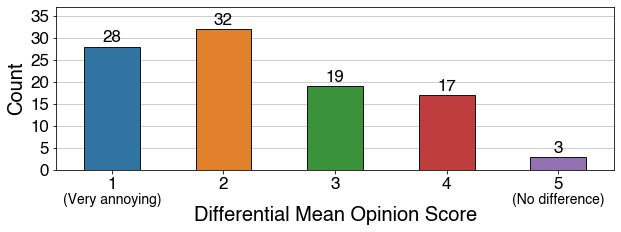

In [6]:
FONT_SM = 17
FONT_LR = 20

fig, (ax2) = plt.subplots(1, 1, figsize=(10,3))

ax = sns.countplot(ax=ax2, data=df, x='Please rate your experience of watching Video #2 in comparison to Video #1.',
                  edgecolor='#141414', linewidth=1)
ax.set_yticks(np.arange(0, 40, 5))
ax.set_yticklabels(np.arange(0, 40, 5), fontsize=FONT_SM)
ax.set_xticks(range(0, 5, 1))
ax.set_xticklabels(['1', '2', '3', '4', '5'], fontsize=FONT_SM)
ax.set_ylabel('Count', fontsize=FONT_LR)
ax.set_xlabel('', fontsize=FONT_LR)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.4, p.get_height()+1), ha='center', fontsize=FONT_SM)
ax.set_axisbelow(True)
ax.yaxis.grid(color='#C2C2C2')
# ax.set_title("DMOS directly provided by users")

ax.set_ylim(0, 37)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 0.5)

plt.text(0, -7.7, "(Very annoying)", ha='center', fontsize=FONT_SM-3)
plt.text(4, -7.7, "(No difference)", ha='center', fontsize=FONT_SM-3)

plt.text(2, -11.5, "Differential Mean Opinion Score", ha='center', fontsize=FONT_LR)

plt.savefig(f"./DMOS_barchart.jpg", format="jpg" , dpi=200, bbox_inches='tight', pad_inches=0.05)

plt.show()

In [5]:
df['DMOS_1'] = df['Please rate the your experience of watching Video #2 based on the scale below.'] - df['Please rate the your experience of watching Video #1 based on the scale below.']

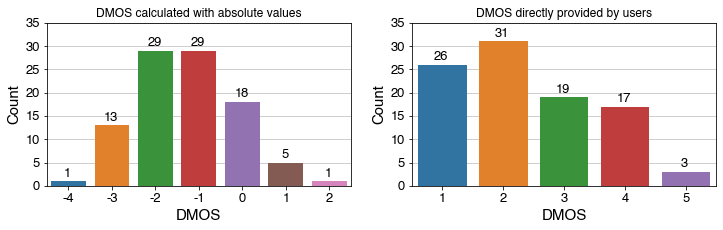

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax = sns.countplot(ax=ax1, data=df, x='DMOS_1')
ax.set_yticks(np.arange(0, 40, 5))
ax.set_yticklabels(np.arange(0, 40, 5), fontsize=13)
ax.set_xticks(range(0, 7, 1))
ax.set_xticklabels(range(-4, 3, 1), fontsize=13)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('DMOS', fontsize=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.38, p.get_height()+1), ha='center', fontsize=13)
ax.set_axisbelow(True)
ax.yaxis.grid(color='#C2C2C2')
ax.set_title("DMOS calculated with absolute values")

ax = sns.countplot(ax=ax2, data=df, x='Please rate your experience of watching Video #2 in comparison to Video #1.')
ax.set_yticks(np.arange(0, 40, 5))
ax.set_yticklabels(np.arange(0, 40, 5), fontsize=13)
ax.set_xticks(range(0, 5, 1))
ax.set_xticklabels(range(1, 6, 1), fontsize=13)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('DMOS', fontsize=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.38, p.get_height()+1), ha='center', fontsize=13)
ax.set_axisbelow(True)
ax.yaxis.grid(color='#C2C2C2')
ax.set_title("DMOS directly provided by users")

plt.savefig(f"./DMOS_barcharts.jpg", format="jpg" , dpi=200, bbox_inches='tight', pad_inches=0.5)

plt.show()

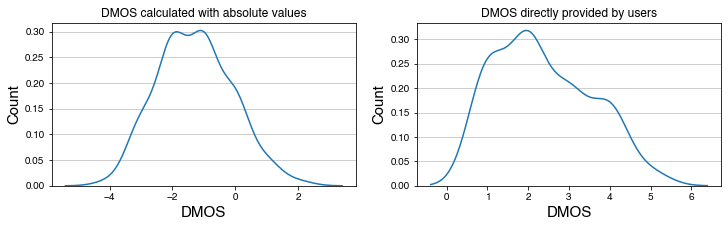

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax = sns.kdeplot(ax=ax1, data=df, x='DMOS_1')
# ax.set_yticks(np.arange(0, 40, 5))
# ax.set_yticklabels(np.arange(0, 40, 5), fontsize=13)
# ax.set_xticks(range(0, 7, 1))
# ax.set_xticklabels(range(-4, 3, 1), fontsize=13)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('DMOS', fontsize=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.38, p.get_height()+1), ha='center', fontsize=13)
ax.set_axisbelow(True)
ax.yaxis.grid(color='#C2C2C2')
ax.set_title("DMOS calculated with absolute values")

ax = sns.kdeplot(ax=ax2, data=df, x='Please rate your experience of watching Video #2 in comparison to Video #1.')
# ax.set_yticks(np.arange(0, 40, 5))
# ax.set_yticklabels(np.arange(0, 40, 5), fontsize=13)
# ax.set_xticks(range(0, 5, 1))
# ax.set_xticklabels(range(1, 6, 1), fontsize=13)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('DMOS', fontsize=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.38, p.get_height()+1), ha='center', fontsize=13)
ax.set_axisbelow(True)
ax.yaxis.grid(color='#C2C2C2')
ax.set_title("DMOS directly provided by users")

plt.savefig(f"./DMOS_distr.jpg", format="jpg" , dpi=200, bbox_inches='tight', pad_inches=0.5)

plt.show()